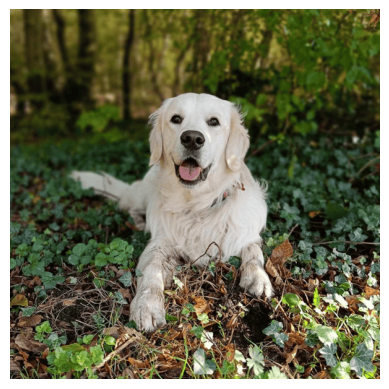

In [1]:
import matplotlib.pyplot as plt

ini_im = plt.imread('Kadoc.png', format='png')[:,:,0:3] # Read the image file
plt.imshow(ini_im)
plt.axis('off')  # Hide the axes
plt.show()  # Display the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.01755661..1.0108088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2930434..1.2233331].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.61303496..1.4652257].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8221462..1.6325439].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0828508..1.9277703].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3490868..2.1651673].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5935

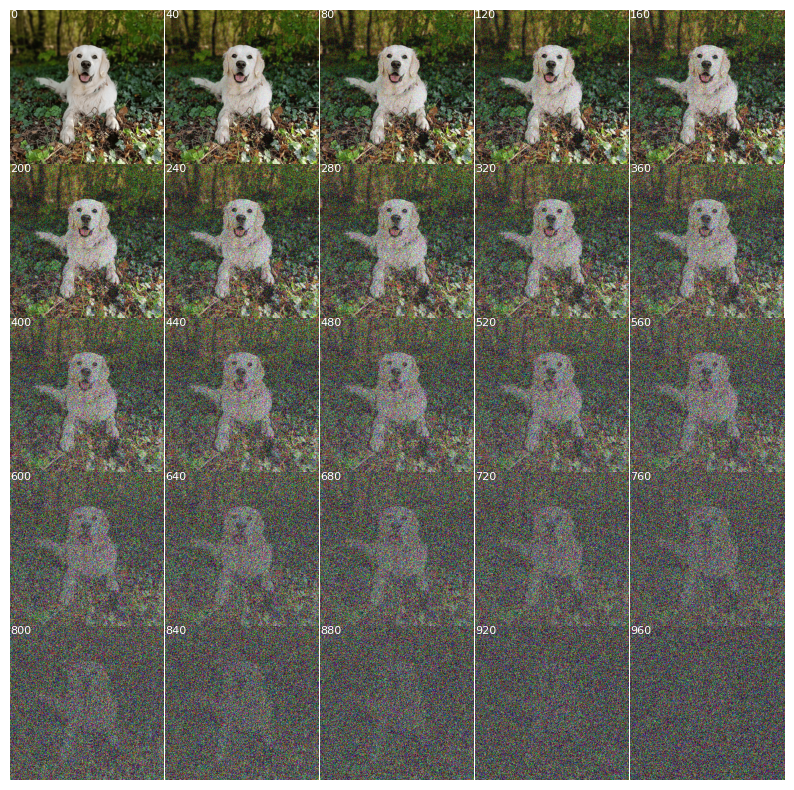

In [2]:
import torch
from core.schedulers import NoiseScheduler

# Add noise one step at a time
noise_scheduler = NoiseScheduler(
    steps=1000,
    betas=(1e-4, 0.02),
    schedule='cosine',
    seed=42
)

all_images = []
x = torch.tensor(ini_im)
for i in range(noise_scheduler.steps):
    x = noise_scheduler.add_noise_step(x, i)
    if i % (noise_scheduler.steps // 25) == 0:
        all_images.append(x.numpy())

# Generate a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# Plot each image in the grid
for i, ax in enumerate(axs.flat):
    if i < len(all_images):
        ax.imshow(all_images[i])
        ax.text(0.5, 0.5, str(i * (noise_scheduler.steps // 25)), color='white', fontsize=8, ha='left', va='top')
    ax.axis('off')  # Hide the axes
plt.show()  # Display the grid of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29208633..1.2299677].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5677618..1.5234389].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.83163315..1.7013402].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1522307..2.0009587].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4466097..2.1012363].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6792378..2.427724].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.90450

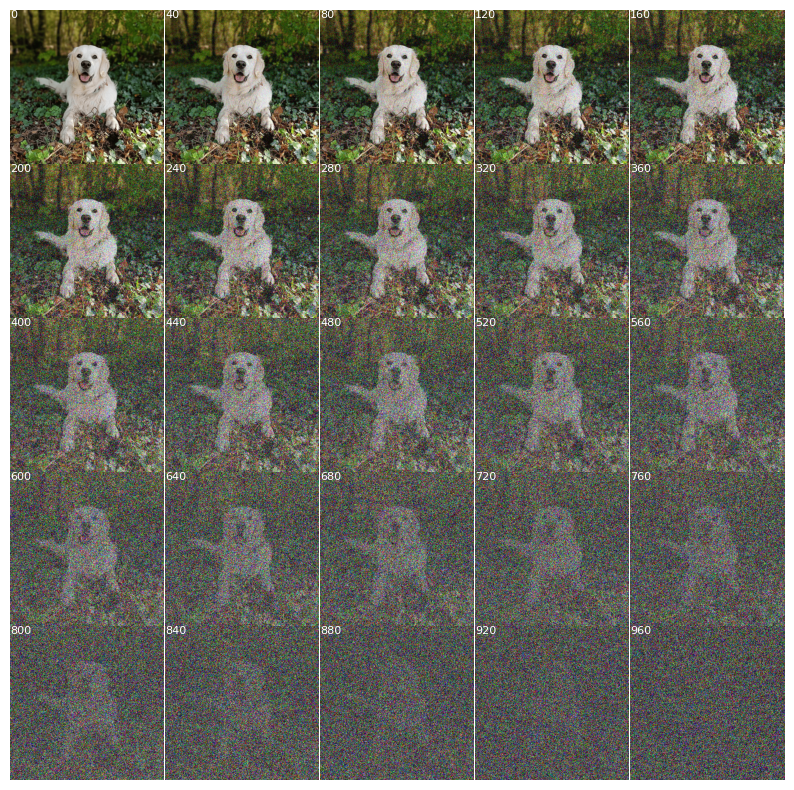

In [3]:
import torch
from core.schedulers import NoiseScheduler

# Add noise one step at a time
noise_scheduler = NoiseScheduler(
    steps=1000,
    betas=(1e-4, 0.02),
    schedule='cosine',
    seed=42
)

all_images = []
x = torch.tensor(ini_im)
for i in range(noise_scheduler.steps):
    if i % (noise_scheduler.steps // 25) == 0:
        all_images.append(noise_scheduler.add_noise_cumulative(x, i))

# Generate a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

# Plot each image in the grid
for i, ax in enumerate(axs.flat):
    if i < len(all_images):
        ax.imshow(all_images[i])
        ax.text(0.5, 0.5, str(i * (noise_scheduler.steps // 25)), color='white', fontsize=8, ha='left', va='top')
    ax.axis('off')  # Hide the axes
plt.show()  # Display the grid of images

In [ ]:
# Results are not equivalent (only similar) because the noise scheduler updates the seed for each step
# and the multi_steps method does not.
# The multi_steps method applies the noise in a single operation, while single_step applies it iteratively.
# This can lead to different noise patterns and thus different results, even if the overall noise level is similar.